In [ ]:
#tensor
import torch

# torch.empty(shape) to allocate memeory for torch tensor with given shape, but the values in it are uninitialized
x = torch.empty (1)
print(x)
y = torch.empty(2)
print(x)
z = torch.empty(2,3)
print(z)
a = torch.empty(2,3,4)
print(a)

# torch.rand (shape) initialize random numbers from 0 to 1 --- torch.randn(shape) for random numbers from 1 to inf.
p = torch.rand([5,3])
print(p)
q = torch.rand([5,3,3])
print(q)
r = torch.randn([1])
print(r)

# torch.zeros(shape) and torch.ones (shape)
d = torch.zeros([2,3])
e = torch.ones([1,2,3])
print(d)
print(e)

tensor([78330.7500])
tensor([78330.7500])
tensor([[7.8331e+04, 4.5168e-41, 3.3558e-18],
        [0.0000e+00, 0.0000e+00, 0.0000e+00]])
tensor([[[1.9784e-40, 0.0000e+00, 0.0000e+00, 0.0000e+00],
         [1.4013e-45, 0.0000e+00,        nan,        nan],
         [2.0179e-43, 0.0000e+00, 2.7045e-43, 0.0000e+00]],

        [[3.3481e-18, 0.0000e+00, 7.8330e+04, 4.5168e-41],
         [1.4013e-45, 0.0000e+00,        nan,        nan],
         [2.6905e-43, 0.0000e+00, 6.7262e-44, 0.0000e+00]]])
tensor([[0.9603, 0.4692, 0.2600],
        [0.0297, 0.8320, 0.6436],
        [0.9265, 0.2644, 0.8437],
        [0.2285, 0.0901, 0.9455],
        [0.3112, 0.8148, 0.4276]])
tensor([[[0.2669, 0.1366, 0.1740],
         [0.1841, 0.2330, 0.8335],
         [0.3483, 0.8932, 0.1020]],

        [[0.3552, 0.5171, 0.7181],
         [0.9393, 0.5479, 0.9233],
         [0.0200, 0.1657, 0.3726]],

        [[0.0133, 0.4277, 0.5700],
         [0.8493, 0.6973, 0.7234],
         [0.3220, 0.5212, 0.2050]],

        [[0.378

In [ ]:
# shape or size of the tensors tensor.shape or tensor.size()
print("shape :",x.shape)
print("size :",y.size())

shape : torch.Size([1])
size : torch.Size([2])


In [ ]:
# checking the datatypes
print("datatype :",x.dtype)

# default float32, we can specify by torch.float64
v = torch.rand([2,3],dtype=torch.float16)
print("datatype :",v.dtype)

datatype : torch.float32
datatype : torch.float16


In [ ]:
# constructing the tensors
x = torch.tensor([3,4,5])
print(x,x.dtype)

tensor([3, 4, 5]) torch.int64


In [ ]:
# requires gradients ...torch keeps tract of the variable for computing gradinents by default
# specified false, we keep requires grad = True for all variables we need to optimize
x = torch.rand([3,4,2],requires_grad=True)
print(x)

tensor([[[0.3152, 0.2445],
         [0.0659, 0.2334],
         [0.9783, 0.5848],
         [0.0982, 0.3640]],

        [[0.1387, 0.3511],
         [0.4334, 0.5036],
         [0.2668, 0.8802],
         [0.1001, 0.1880]],

        [[0.8020, 0.5301],
         [0.7206, 0.7784],
         [0.8472, 0.4149],
         [0.2028, 0.8670]]], requires_grad=True)


In [ ]:
# simple operations on tensor addition, subs,mul,div

x = torch.ones([2,2])
y = torch.ones([2,2])

z = x+y
p = torch.add(x,y)
r = y.add(x) # y.add_(x) is inplace=true addition
print(x,y,z,p,r)

a = x-y
b = x * y
c = x/y
print(a,b,c)

tensor([[1., 1.],
        [1., 1.]]) tensor([[1., 1.],
        [1., 1.]]) tensor([[2., 2.],
        [2., 2.]]) tensor([[2., 2.],
        [2., 2.]]) tensor([[2., 2.],
        [2., 2.]])
tensor([[0., 0.],
        [0., 0.]]) tensor([[1., 1.],
        [1., 1.]]) tensor([[1., 1.],
        [1., 1.]])


In [ ]:
# slicing
print(x[:,1])

# get the float value if there is single item in our tensor with item()
print(x[1,1].item())

tensor([1., 1.])
1.0


In [ ]:
# reshaping the shape of tensors using view()
m = torch.rand([4,4])
n = m.view(16)
o = m.view(-1,8) # -1 automatically identifies the correct shape, as we need 8 cols so the prior value would be 2

print(m.shape,n.shape,n.shape)
print(m,n,o)

torch.Size([4, 4]) torch.Size([16]) torch.Size([16])
tensor([[0.0994, 0.9870, 0.4609, 0.1777],
        [0.3087, 0.9477, 0.8425, 0.8061],
        [0.8372, 0.2389, 0.0223, 0.6671],
        [0.3830, 0.3558, 0.8153, 0.6025]]) tensor([0.0994, 0.9870, 0.4609, 0.1777, 0.3087, 0.9477, 0.8425, 0.8061, 0.8372,
        0.2389, 0.0223, 0.6671, 0.3830, 0.3558, 0.8153, 0.6025]) tensor([[0.0994, 0.9870, 0.4609, 0.1777, 0.3087, 0.9477, 0.8425, 0.8061],
        [0.8372, 0.2389, 0.0223, 0.6671, 0.3830, 0.3558, 0.8153, 0.6025]])


In [ ]:
# conversion from numpy to tensor and vice versa
import numpy as np
x = np.random.rand(2,3)
y = torch.from_numpy(x)
z = torch.tensor(x) # either from_numpy or with tensor
print(x)
print(y)
print(z)

# when using cpu, both numpy array and pytorch tensor (created from numpy ) occupy same mem location, so if we change any of them, the other will also change
# here x is a numpy array, y is a tensor created using from numpy, and z is a tensor created using tensor, so x and y will remain same but z remains unchanged.
# .tensor() creates a new mem location and new array.
y.add_(5)
print(x)
print(y)

[[0.2419543  0.39194978 0.54398543]
 [0.70746641 0.17014093 0.15646848]]
tensor([[0.2420, 0.3919, 0.5440],
        [0.7075, 0.1701, 0.1565]], dtype=torch.float64)
tensor([[0.2420, 0.3919, 0.5440],
        [0.7075, 0.1701, 0.1565]], dtype=torch.float64)
[[5.2419543  5.39194978 5.54398543]
 [5.70746641 5.17014093 5.15646848]]
tensor([[5.2420, 5.3919, 5.5440],
        [5.7075, 5.1701, 5.1565]], dtype=torch.float64)


In [ ]:
# by default all the tensors are created in cpu, to move to gpu or create them on gpu
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu') # can specify cuda:0 or cuda:1 or likewise if we have multiple gpus

x = torch.rand([2,3]).to(device) # move to the gpu
y = torch.rand([2,3],device=device) # directly create in gpu --- this one is efficient


### Autograd

In [ ]:
# autograd requires the require_grad argument in tensor creation to be true so that pytorch can track it
f = torch.rand([2,3],requires_grad=True)

g = f + 2

print(f)
print(g)
print(g.grad_fn)

tensor([[0.7175, 0.0520, 0.4589],
        [0.5684, 0.6822, 0.3791]], requires_grad=True)
tensor([[2.7175, 2.0520, 2.4589],
        [2.5684, 2.6822, 2.3791]], grad_fn=<AddBackward0>)


In [ ]:
h = g * g *3
print(h)
h = h.mean()
print(h)

tensor([[22.1541, 12.6322, 18.1390],
        [19.7906, 21.5827, 16.9804]], grad_fn=<MulBackward0>)
tensor(18.5465, grad_fn=<MeanBackward0>)


In [ ]:
# now we can call h.backward() to compute gradients automatically during backpropagation, tensor with requires_grad = True will have a grad attribute
# where the gradients will be stored.

print(f.grad) # none as we havent called the backward fn
h.backward() # computes dh/df
print(f.grad)

# .backward() actually accumulates the gradients so we must later on do something like optimizer.zero_grad() or tensor like w.grad.zero_()

None
tensor([[2.7175, 2.0520, 2.4589],
        [2.5684, 2.6822, 2.3791]])


In [ ]:
# we can stop the tracking by using requires_grad = false or with torch.no_grad()
# we often need to stop tracking of the tensor during updates on weights during training or after training during evaluation.

i = torch.randn([2,3], requires_grad=True)
j = (i*i).sum()
print(i)
print(j.grad_fn)

# . detach gets the same copy of the tensor but with no grad tracking
k = i.detach() # we dont want to track k
print(k.requires_grad)

# or we can also use with torch.no_grad()
with torch.no_grad():
  l = i*i
  print(l.requires_grad)

tensor([[-0.9647,  0.5208,  0.0267],
        [ 0.8714,  0.5180, -0.3480]], requires_grad=True)
False
False


### simple linear regression with autograd
y = wx + b, b =0 and w = 2 , y = 2x is our true function

In [ ]:
import torch

x = torch.tensor([1,2,3,4,5,6,7,8,9],dtype=torch.float32)
y = torch.tensor([2,4,6,8,10,12,14,16,18],dtype = torch.float32)

w = torch.tensor([0],dtype = torch.float32, requires_grad = True)

# defining forward function
def forward(x):
  return w*x

# calculating loss : MSE
def loss (y_pred,y):
  return ((y-y_pred)**2).mean()

x_test = 10.0
print("before training y = ", forward(x_test))

before training y =  tensor([0.], grad_fn=<MulBackward0>)


In [ ]:
epochs = 100
learning_rate = 0.01

for epoch in range(epochs):
  # forward pass
  y_pred = forward(x)
  # calculate loss
  l = loss(y,y_pred)
  # backward pass i.e gradient calc
  l.backward()
  # optimize the model i.e update weights
  with torch.no_grad():
    w -= learning_rate * w.grad

  w.grad.zero_()

  if epoch%9==0:
    print(f"after epoch {epoch} w : {w.item():.3f} loss : {l.item():.3f}")

print("after training y = ", forward(x_test).item())

after epoch 0 w : 2.000 loss : 0.000
after epoch 9 w : 2.000 loss : 0.000
after epoch 18 w : 2.000 loss : 0.000
after epoch 27 w : 2.000 loss : 0.000
after epoch 36 w : 2.000 loss : 0.000
after epoch 45 w : 2.000 loss : 0.000
after epoch 54 w : 2.000 loss : 0.000
after epoch 63 w : 2.000 loss : 0.000
after epoch 72 w : 2.000 loss : 0.000
after epoch 81 w : 2.000 loss : 0.000
after epoch 90 w : 2.000 loss : 0.000
after epoch 99 w : 2.000 loss : 0.000
after training y =  20.0


#### pytorch ofcourse has defined loss and optimizers. lets implement our simple linear regression in pytorch style. The general pipeline is often definiing the model its inputs and outputs and forward pass and layers, constructing loss and optimizers, and training i.e forward pass, backward pass and updates.

In [ ]:

# defining input and output data
x = torch.tensor([1,2,3,4,5,6,7,8,9],dtype=torch.float32)
y = torch.tensor([2,4,6,8,10,12,14,16,18],dtype=torch.float32)

print(x.shape,y.shape)

x = x.view(-1,1)
y = y.view(-1,1) # n samples 1 feature

print(x.shape,y.shape)

torch.Size([9]) torch.Size([9])
torch.Size([9, 1]) torch.Size([9, 1])


In [ ]:
#defining model
import torch.nn as nn

class LinearRegression(nn.Module):

  def __init__(self,input_dim,output_dim):
    super(LinearRegression,self).__init__()

    # define layers
    self.lin = nn.Linear(input_dim,output_dim)

  def forward(self,x):
    return (self.lin(x))

n_samples,n_features = x.shape
model = LinearRegression(input_dim = n_features, output_dim = n_features)  # 1,1

# prediction before training
x_test = torch.tensor([10.0],dtype=torch.float32)
print(f"before training y_pred = {model(x_test).item():.3f}")

before training y_pred = -2.547


In [ ]:
# defining loss and optimizer
epochs = 100
learning_rate = 0.01

loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(),lr = learning_rate)

# training loop

for epoch in range(epochs):
  # forward pass
  y_pred = model(x)
  # loss
  l = loss(y,y_pred)
  # backward pass
  l.backward()

  # optimize
  optimizer.step()
  optimizer.zero_grad()

  if epoch % 9 ==0:
    w,b = model.parameters() # unpacking the parameters
    print(f"epoch {epoch} loss = {l.item():.3f} w= {w[0][0].item():.3f}")

print(f"after training y_pred = {model(x_test).item():.3f}")


epoch 0 loss = 153.309 w= 1.042
epoch 9 loss = 0.333 w= 1.801
epoch 18 loss = 0.309 w= 1.808
epoch 27 loss = 0.287 w= 1.815
epoch 36 loss = 0.266 w= 1.822
epoch 45 loss = 0.247 w= 1.828
epoch 54 loss = 0.230 w= 1.835
epoch 63 loss = 0.213 w= 1.841
epoch 72 loss = 0.198 w= 1.846
epoch 81 loss = 0.184 w= 1.852
epoch 90 loss = 0.171 w= 1.857
epoch 99 loss = 0.159 w= 1.863
after training y_pred = 19.491


In [ ]:
# classic example of nn as universal approximator

import torch

# Defining the range for x1 and x2
numbers = list(range(1, 10)) # [1, 2, 3, 4, 5, 6, 7, 8, 9]

X_data = [] # Features (x1, x2)
y_data = [] # Labels (x1 + x2)

# Generate data for all combinations
for x1 in numbers:
    for x2 in numbers:
        X_data.append([float(x1), float(x2)]) # Ensure floats for potential torch.float32
        y_data.append(float(x1 + x2))

# Convert to PyTorch tensors
# Features: Shape (81, 2)
X = torch.tensor(X_data, dtype=torch.float32)

# Labels: Shape (81, 1) - ensure it's a column vector for consistent loss calculation
y = torch.tensor(y_data, dtype=torch.float32).reshape(-1, 1)

print("Shape of X (features):", X.shape)
print("Shape of y (labels):", y.shape)

x_test = torch.tensor([12,13],dtype=torch.float32)

Shape of X (features): torch.Size([81, 2])
Shape of y (labels): torch.Size([81, 1])


In [ ]:
model2 = LinearRegression(input_dim=2,output_dim=1)

# defining loss and optimizer
epochs = 100
learning_rate = 0.01

loss = nn.MSELoss()
optimizer = torch.optim.SGD(model2.parameters(),lr = learning_rate)

# training loop

for epoch in range(epochs):
  # forward pass
  y_pred = model2(X)
  # loss
  l = loss(y,y_pred)
  # backward pass
  l.backward()

  # optimize
  optimizer.step()
  optimizer.zero_grad()

  if epoch % 9 ==0:
    w,b = model2.parameters() # unpacking the parameters
    print(f"epoch {epoch} loss = {l.item():.3f} w= {w[0][0].item():.3f}")

print(f"after training y_pred = {model2(x_test).item():.3f}")



epoch 0 loss = 43.101 w= 1.316
epoch 9 loss = 0.068 w= 1.064
epoch 18 loss = 0.005 w= 1.019
epoch 27 loss = 0.000 w= 1.006
epoch 36 loss = 0.000 w= 1.003
epoch 45 loss = 0.000 w= 1.002
epoch 54 loss = 0.000 w= 1.002
epoch 63 loss = 0.000 w= 1.002
epoch 72 loss = 0.000 w= 1.002
epoch 81 loss = 0.000 w= 1.002
epoch 90 loss = 0.000 w= 1.002
epoch 99 loss = 0.000 w= 1.002
after training y_pred = 25.021


### Neural Network

In [ ]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

input_size = 784 # 28x28
output_size = 10
hidden_dim = 512
batch_size = 64

# datapipeline use datasets from pytorch and dataloader
train_data = torchvision.datasets.MNIST(
    root = '/data',
    transform = transforms.ToTensor(),
    train = True,
    download = True
)

test_data = torchvision.datasets.MNIST(
    root = '/data',
    transform = transforms.ToTensor(),
    train = False,
    download = True
)

train_loader = torch.utils.data.DataLoader(train_data, batch_size = batch_size, shuffle = True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size= batch_size, shuffle = False)


100%|██████████| 9.91M/9.91M [00:00<00:00, 18.0MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 496kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.56MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 11.0MB/s]


torch.Size([64, 1, 28, 28]) torch.Size([64])


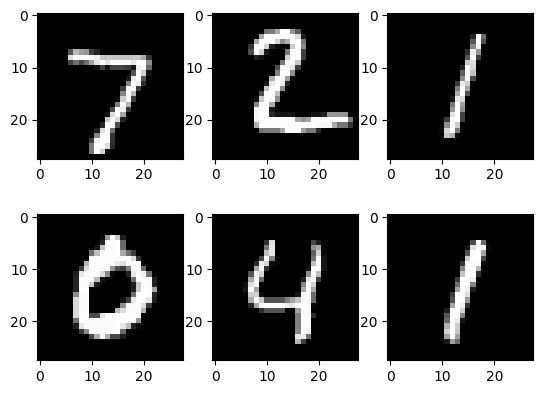

In [ ]:
sample = iter(test_loader)
images,labels = next(sample)
print(images.shape,labels.shape)

for i in range(6):
  plt.subplot(2,3,i+1)
  plt.imshow(images[i][0],cmap = 'gray')
plt.show()

In [ ]:
# creating nn
class NeuralNetwork(nn.Module):
  def __init__(self,input_size,hidden_dim,output_size):
    super(NeuralNetwork,self).__init__()
    self.linear1 = nn.Linear(input_size,hidden_dim)
    self.relu = nn.ReLU()
    self.linear2 = nn.Linear(hidden_dim,output_size)

  def forward(self,x):
    out = self.linear1(x)
    out = self.relu(out)
    out = self.linear2(out)
    return out

model = NeuralNetwork(input_size= input_size,hidden_dim = hidden_dim, output_size = output_size).to(device)


In [ ]:
epochs = 10
learning_rate = 0.01

# loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr= learning_rate)

total_batch = len(train_loader)
# training loop
for epoch in range(epochs):
  for idx,(images,labels) in enumerate(train_loader):
    images = images.reshape(-1,28*28).to(device)
    labels = labels.to(device)

    #forward pass
    out_pred = model(images)
    # loss
    loss = criterion(out_pred,labels)
    # backward pass
    loss.backward()

    # update weights
    optimizer.step()
    optimizer.zero_grad()

  print(f" epoch {epoch}/{epochs}  loss = {loss.item():.3f}")

 epoch 0/10  loss = 0.252
 epoch 1/10  loss = 0.003
 epoch 2/10  loss = 0.189
 epoch 3/10  loss = 0.003
 epoch 4/10  loss = 0.000
 epoch 5/10  loss = 0.013
 epoch 6/10  loss = 0.000
 epoch 7/10  loss = 0.002
 epoch 8/10  loss = 0.000
 epoch 9/10  loss = 0.000


In [ ]:
# evaluating the model
with torch.no_grad():
  correct_pred = 0
  for (images,labels) in test_loader:
    images = images.reshape(-1,28*28).to(device)
    labels = labels.to(device)

    output = model(images)

    _,predicted_index = torch.max(output,dim=1) # across the dimension 1 as batch_size,classes is the output
    correct_pred += (predicted_index == labels).sum().item()

  accuracy = correct_pred/len(test_loader.dataset) * 100
  print(f" accuracy of the model on {len(test_loader.dataset)} samples : {accuracy}")

 accuracy of the model on 10000 samples : 97.07000000000001


### CNN implementation

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

num_channels = 3,
hidden_dim = 512
output_size = 10
batch_size = 64

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# download the cifar 10 dataset

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])

train_data = torchvision.datasets.CIFAR10(
    root = '/cifar10',
    transform = transform,
    train=True,
    download = True
)

test_data = torchvision.datasets.CIFAR10(
    root = '/cifar10',
    transform = transform,
    train=False,
    download = True
)

train_loader = torch.utils.data.DataLoader(train_data,batch_size=batch_size, shuffle = True)
test_loader = torch.utils.data.DataLoader(test_data,batch_size=batch_size,shuffle=False)


100%|██████████| 170M/170M [00:04<00:00, 42.5MB/s]


torch.Size([64, 3, 32, 32]) torch.Size([64])


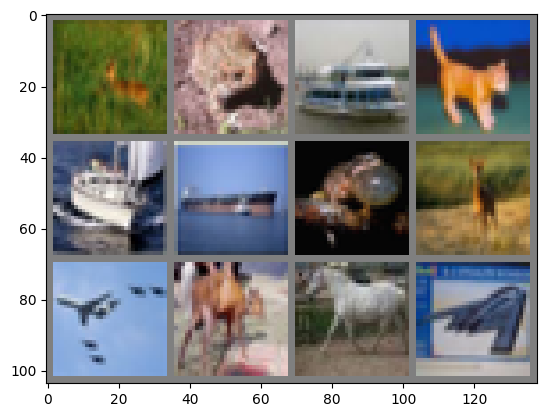

In [ ]:
import numpy as np

samples = iter(train_loader)
images,labels = next(samples)
print(images.shape,labels.shape)

img_grid = torchvision.utils.make_grid(images[0:12],nrow=4)
imgs = img_grid/2 + 0.5
npimg = imgs.numpy()
plt.imshow(np.transpose(npimg,(1,2,0)))
plt.show()

In [ ]:
class Convnet(nn.Module):
  def __init__(self):
    super(Convnet,self).__init__()
    self.c1 = nn.Conv2d(3,32,3)
    self.pool1 = nn.MaxPool2d(2,2)
    self.c2 = nn.Conv2d(32,64,3)
    self.pool2 = nn.MaxPool2d(2,2)
    self.c3 = nn.Conv2d(64,64,3)
    self.l1 = nn.Linear(64*4*4,64)
    self.l2 = nn.Linear(64,10)

  def forward(self,x):
    out = F.relu(self.c1(x))
    out = self.pool1(out)
    out = F.relu(self.c2(out))
    out = self.pool2(out)
    out = F.relu(self.c3(out))
    out = torch.flatten(out,1)
    out = F.relu(self.l1(out))
    out = self.l2(out)
    return out

model = Convnet().to(device)


In [ ]:
# training loop
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.001)

for epoch in range(20):

  for idx,(images,labels) in enumerate(train_loader):

    images = images.to(device)
    labels = labels.to(device)

    out_pred = model(images)
    loss = criterion(out_pred,labels)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

  print(f" epoch {epoch}/{10}  loss = {loss.item():.3f}")

# saving the model
print("finished training")
path = './conv_net.pth'
torch.save(model.state_dict(),path)



 epoch 0/10  loss = 0.727
 epoch 1/10  loss = 0.348
 epoch 2/10  loss = 0.126
 epoch 3/10  loss = 0.068
 epoch 4/10  loss = 0.450
 epoch 5/10  loss = 0.256
 epoch 6/10  loss = 0.331
 epoch 7/10  loss = 0.324
 epoch 8/10  loss = 0.342
 epoch 9/10  loss = 0.252
 epoch 10/10  loss = 0.137
 epoch 11/10  loss = 0.577
 epoch 12/10  loss = 0.103
 epoch 13/10  loss = 0.070
 epoch 14/10  loss = 0.089
 epoch 15/10  loss = 0.412
 epoch 16/10  loss = 0.175
 epoch 17/10  loss = 0.187
 epoch 18/10  loss = 0.447
 epoch 19/10  loss = 0.089
finished training


In [ ]:
loaded_model = Convnet()
loaded_model.load_state_dict(torch.load(path))
loaded_model.to(device)
loaded_model.eval()

with torch.no_grad():

  correct_pred = 0
  for (images,labels) in test_loader:
    images = images.to(device)
    labels = labels.to(device)

    output = loaded_model(images)

    _,predicted = torch.max(output,dim=1)
    correct_pred += (predicted == labels).sum().item()

  accuracy = correct_pred/len(test_loader.dataset) * 100
  print(f" accuracy of the model on {len(test_loader.dataset)} samples : {accuracy}")



 accuracy of the model on 10000 samples : 70.69
